In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

data = pd.read_csv('unique_tiendas.csv')

In [ ]:
data

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,exito_70
0,1,2,C,Hogar,0.00,0,0,26.00177,-98.24284,Hogar Reunión,UT_DENSIDAD,TRAIN,0
1,1001,2,C,Hogar,101.82,12,10,26.01288,-98.26235,Hogar Reunión,UT_DENSIDAD,TRAIN,1
2,1002,2,C,Hogar,116.90,10,11,26.02280,-98.28886,Hogar Reunión,UT_DENSIDAD,TRAIN,1
3,1003,2,C,Hogar,112.00,12,8,25.99560,-98.24710,Hogar Reunión,UT_DENSIDAD,TRAIN,1
4,1004,2,C,Hogar,93.52,12,9,26.09947,-98.32143,Hogar Reunión,UT_DENSIDAD,TRAIN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,995,2,C,Base,106.60,12,10,26.03482,-98.40996,Hogar Reunión,UT_GAS_URBANA,TRAIN,1
944,996,2,C,Hogar,107.85,12,7,25.98884,-98.27356,Hogar Reunión,UT_DENSIDAD,TRAIN,1
945,997,2,C,Hogar,101.82,12,11,25.99333,-98.27173,Hogar Reunión,UT_DENSIDAD,TRAIN,1
946,998,2,AB,Hogar,107.85,12,12,26.07585,-98.26928,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN,1


In [ ]:
df= pd.DataFrame(data)
df_cumplen = df[df['exito_70'] == 1]
df_no_cumplen = df[df['exito_70'] == 0]

In [ ]:
df_no_cumplen

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,exito_70
0,1,2,C,Hogar,0.00,0,0,26.00177,-98.24284,Hogar Reunión,UT_DENSIDAD,TRAIN,0
13,1013,2,C,Hogar,111.04,12,7,26.05979,-98.41287,Hogar Reunión,UT_DENSIDAD,TRAIN,0
22,1022,2,C,Hogar,112.00,0,10,26.07911,-98.32554,Hogar Reunión,UT_DENSIDAD,TRAIN,0
38,1038,2,C,Hogar,132.73,0,11,26.05081,-98.40391,Barrio Competido,UT_DENSIDAD,TRAIN,0
40,104,4,C,Hogar,0.00,13,0,25.66592,-100.09583,Hogar Reunión,UT_DENSIDAD,TRAIN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,957,2,C,Hogar,145.00,10,13,26.03575,-98.37990,Hogar Reunión,UT_DENSIDAD,TRAIN,0
907,959,2,B,Receso,118.00,11,11,26.06102,-98.29517,Clásico,UT_TRAFICO_VEHICULAR,TRAIN,0
910,962,2,C,Hogar,136.00,10,12,26.02219,-98.27036,Hogar Reunión,UT_DENSIDAD,TRAIN,0
919,971,2,C,Hogar,123.00,11,12,26.03660,-98.34031,Hogar Reunión,UT_DENSIDAD,TRAIN,0


In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.

In [ ]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer
df = df_no_cumplen.copy()

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df)


cat_cols = [
    'PLAZA_CVE',
    'NIVELSOCIOECONOMICO_DES', 'ENTORNO_DES',
    'SEGMENTO_MAESTRO_DESC', 'LID_UBICACION_TIENDA',
    'DATASET'
]

for col in cat_cols:
    metadata.update_column(column_name=col, sdtype='categorical')



synth = CTGANSynthesizer(metadata)
synth.fit(df)

synthetic = synth.sample(num_rows=150)


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:145: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:123: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
synthetic = synth.sample(num_rows=200)


<Axes: >

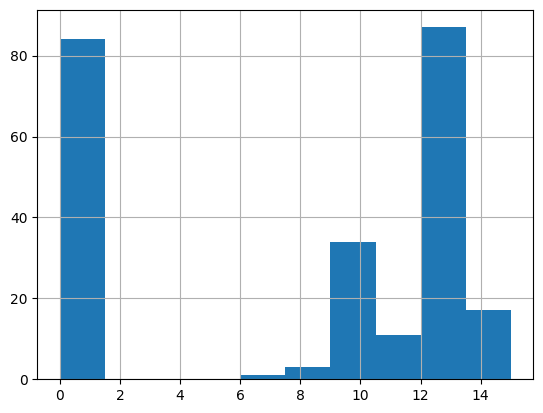

In [ ]:
df_no_cumplen.PUERTASREFRIG_NUM.hist()

In [ ]:
synthetic

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,exito_70
0,8009038,2,C,Receso,124.78,12,0,24.95376,-100.38827,Parada Técnica,UT_DENSIDAD,TRAIN,0
1,2033875,4,C,Receso,133.18,14,0,25.17862,-99.23714,Hogar Reunión,UT_DENSIDAD,TRAIN,0
2,15563906,1,C,Receso,131.76,0,0,26.06718,-100.38827,Hogar Reunión,UT_CARRETERA_GAS,TRAIN,0
3,4478648,6,C,Hogar,17.21,0,0,25.51794,-100.38827,Parada Técnica,UT_DENSIDAD,TRAIN,0
4,3625727,4,C,Hogar,120.40,0,1,25.62345,-98.43297,Oficinistas,UT_CARRETERA_GAS,TRAIN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2839512,1,C,Hogar,3.20,0,12,26.09732,-100.38827,Parada Técnica,UT_TRAFICO_VEHICULAR,TRAIN,0
196,15595073,6,C,Base,131.97,9,7,25.69434,-98.62323,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN,0
197,13482041,3,C,Base,85.21,10,0,25.81549,-100.38827,Clásico,UT_TRAFICO_VEHICULAR,TRAIN,0
198,6743765,1,C,Peatonal,125.87,0,0,26.08834,-99.94101,Hogar Reunión,UT_DENSIDAD,TRAIN,0


In [ ]:
full_no = pd.concat([df_no_cumplen, synthetic])

In [ ]:
final = pd.concat([full_no, df_cumplen])

In [ ]:
final.exito_70.value_counts()

,count
exito_70,
1,711
0,437


In [ ]:
final.dtypes

,0
TIENDA_ID,int64
PLAZA_CVE,int64
NIVELSOCIOECONOMICO_DES,object
ENTORNO_DES,object
MTS2VENTAS_NUM,float64
PUERTASREFRIG_NUM,int64
CAJONESESTACIONAMIENTO_NUM,int64
LATITUD_NUM,float64
LONGITUD_NUM,float64
SEGMENTO_MAESTRO_DESC,object


In [ ]:
final

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,exito_70
0,1,2,C,Hogar,0.00,0,0,26.00177,-98.24284,Hogar Reunión,UT_DENSIDAD,TRAIN,0
13,1013,2,C,Hogar,111.04,12,7,26.05979,-98.41287,Hogar Reunión,UT_DENSIDAD,TRAIN,0
22,1022,2,C,Hogar,112.00,0,10,26.07911,-98.32554,Hogar Reunión,UT_DENSIDAD,TRAIN,0
38,1038,2,C,Hogar,132.73,0,11,26.05081,-98.40391,Barrio Competido,UT_DENSIDAD,TRAIN,0
40,104,4,C,Hogar,0.00,13,0,25.66592,-100.09583,Hogar Reunión,UT_DENSIDAD,TRAIN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,995,2,C,Base,106.60,12,10,26.03482,-98.40996,Hogar Reunión,UT_GAS_URBANA,TRAIN,1
944,996,2,C,Hogar,107.85,12,7,25.98884,-98.27356,Hogar Reunión,UT_DENSIDAD,TRAIN,1
945,997,2,C,Hogar,101.82,12,11,25.99333,-98.27173,Hogar Reunión,UT_DENSIDAD,TRAIN,1
946,998,2,AB,Hogar,107.85,12,12,26.07585,-98.26928,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN,1


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

X = final.drop(columns=['TIENDA_ID', 'exito_70', 'DATASET'])
y = final['exito_70']

cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()

X_encoded = X.copy()
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    le_dict[col] = le

scaler = MinMaxScaler()
X_scaled_array = scaler.fit_transform(X_encoded)
X_scaled = pd.DataFrame(X_scaled_array, columns=X_encoded.columns, index=X_encoded.index)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from imblearn.under_sampling import RandomUnderSampler


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

gb = GradientBoostingClassifier(
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        n_estimators=1000,
        random_state=42
)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


gb.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
val_scores = np.zeros(gb.n_estimators)

for train_idx, val_idx in cv.split(X_train, y_train):
    gb.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])

    for i, y_pred in enumerate(gb.staged_predict(X_train.iloc[val_idx])):
      val_scores[i] += accuracy_score(y_train.iloc[val_idx], y_pred)


best_n = val_scores.argmax() + 1        # +1 because index starts at 0
print(f"Best n_estimators ≈ {best_n}")

# Re-train with the optimal number of trees
gb_final = GradientBoostingClassifier(
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        n_estimators=best_n,
        random_state=42
).fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, gb_final.predict(X_test)))
print(classification_report(y_test, gb_final.predict(X_test)))



Best n_estimators ≈ 69
Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       131
           1       0.80      0.76      0.78       214

    accuracy                           0.73       345
   macro avg       0.72      0.73      0.72       345
weighted avg       0.74      0.73      0.74       345



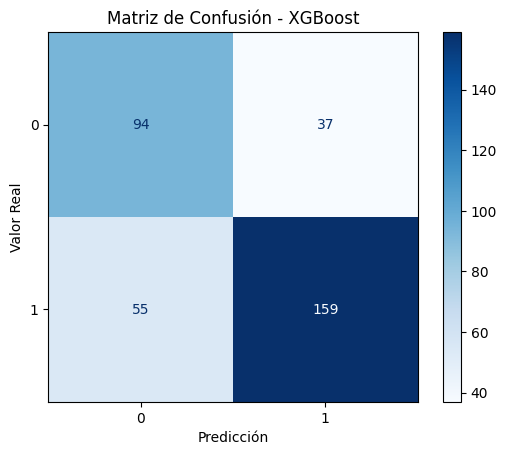

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)



model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    learning_rate=0.03,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=1000,
    reg_alpha=0.5,        # L1 regularization
    reg_lambda=1.0,       # L2 regularization
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb_tuned.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - XGBoost')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [ ]:
import pickle

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(model, f)
import pickle
import joblib

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("encoders.pkl", "wb") as f:
    pickle.dump(le_dict, f)
